In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load and explore the dataset
df = pd.read_csv('Dataset of Diabetes .csv')

# View the first few rows of the dataset
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [3]:
# View unique values in the 'CLASS' column
df['CLASS'].unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [4]:
# Clean up extra whitespace
df['CLASS'] = df['CLASS'].replace({'N ': 'N', 'Y ': 'Y'})

In [5]:
# Verify changes
df['CLASS'].unique()

array(['N', 'P', 'Y'], dtype=object)

In [6]:
# View unique values in the 'Gender' column
df['Gender'].unique()

array(['F', 'M', 'f'], dtype=object)

In [7]:
# Replace lowercase 'f' with uppercase 'F'
df['Gender'] = df['Gender'].replace({'f': 'F'})

In [8]:
# Verify changes
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [9]:
# Drop 'ID' and 'No_Pation' columns as they are not needed for the model
df = df.drop(columns=['ID', 'No_Pation']) #'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL'

In [10]:
df.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [11]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])

# Encode target column 'CLASS'
le_class = LabelEncoder()
df['CLASS'] = le_class.fit_transform(df['CLASS'])

# Display the cleaned and encoded dataset
df.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0


In [12]:
# Split data into features (X) and target (y)
X = df.drop(columns=['CLASS'])

# Target variable
y = df['CLASS']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Import necessary libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_weighted',
    'recall': 'recall_weighted',
    'f1': 'f1_weighted'
}

# Define models with pipelines
models = {
    "Random Forest": ImbPipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('model', RandomForestClassifier(random_state=42))
    ]),

    "Logistic Regression": ImbPipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('model', LogisticRegression(max_iter=1000, random_state=42))
    ]),
    

    "K-Nearest Neighbors": ImbPipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('model', KNeighborsClassifier(n_neighbors=5, weights='distance'))
    ])
    
}

# Cross-validation for each model
for name, pipeline in models.items():
    print(f"{name} Cross-Validation Results:")
    cv_results = cross_validate(pipeline, X, y, cv=5, scoring=scoring)
    for metric, scores in cv_results.items():
        if metric.startswith("test_"):
            metric_name = metric.replace("test_", "").capitalize()
            print(f"Mean {metric_name}: {scores.mean():.2f}")
    print("-" * 50)

Random Forest Cross-Validation Results:
Mean Accuracy: 0.95
Mean Precision: 0.97
Mean Recall: 0.95
Mean F1: 0.96
--------------------------------------------------
Logistic Regression Cross-Validation Results:
Mean Accuracy: 0.90
Mean Precision: 0.95
Mean Recall: 0.90
Mean F1: 0.92
--------------------------------------------------
K-Nearest Neighbors Cross-Validation Results:
Mean Accuracy: 0.88
Mean Precision: 0.93
Mean Recall: 0.88
Mean F1: 0.89
--------------------------------------------------


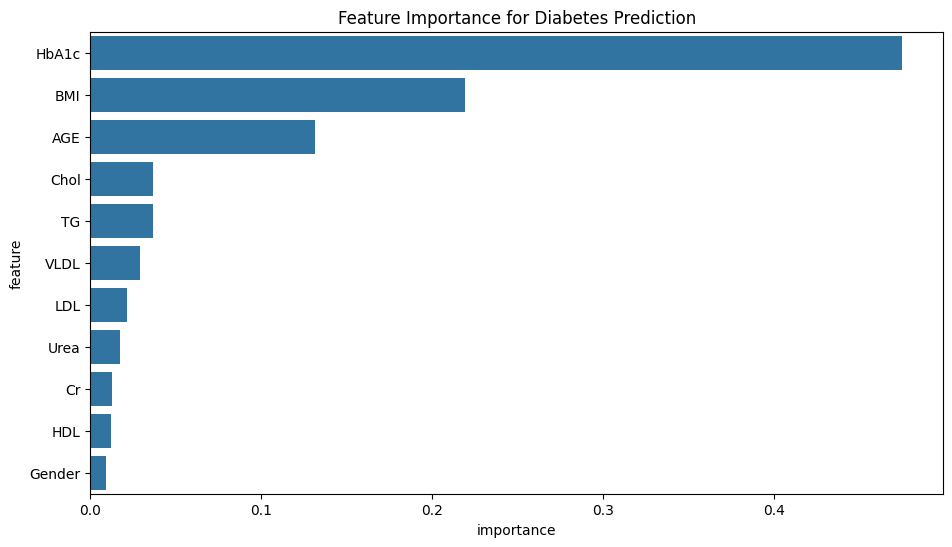

In [15]:
# Feature importance visualization (Random Forest example)
rf_pipeline = models["Random Forest"]
rf_pipeline.fit(X_train, y_train)
rf_model = rf_pipeline.named_steps['model']
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(11, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance for Diabetes Prediction')
plt.show()

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__n_neighbors': [3, 5, 7, 9],
    'model__weights': ['uniform', 'distance']
}

knn_pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('model', KNeighborsClassifier())
])

grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters: {'model__n_neighbors': 3, 'model__weights': 'distance'}
Best cross-validation score: 0.9100000000000001


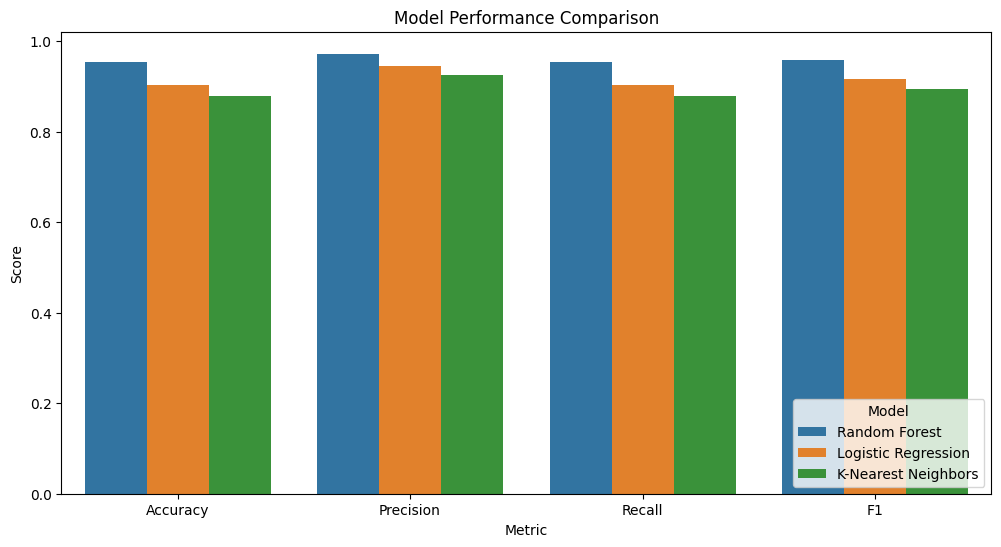

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Collect metrics for visualization
metrics = {'Model': [], 'Metric': [], 'Value': []}
for name, pipeline in models.items():
    cv_results = cross_validate(pipeline, X, y, cv=5, scoring=scoring)
    for metric, scores in cv_results.items():
        if metric.startswith("test_"):
            metrics['Model'].append(name)
            metrics['Metric'].append(metric.replace("test_", "").capitalize())
            metrics['Value'].append(scores.mean())

# Create DataFrame for visualization
metrics_df = pd.DataFrame(metrics)

# Plot performance comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Value', hue='Model', data=metrics_df)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.legend(title='Model', loc='lower right')
plt.show()

Confusion Matrix for Random Forest:


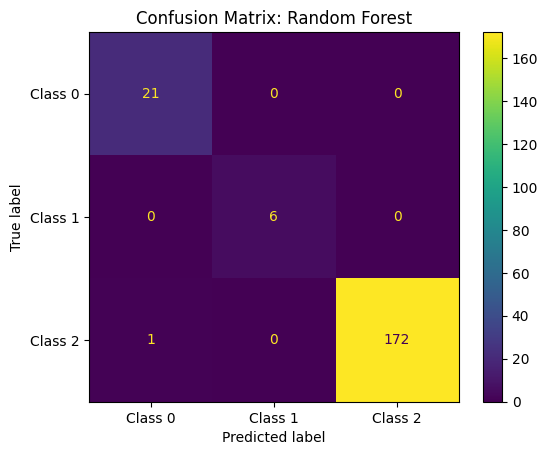

Confusion Matrix for Logistic Regression:


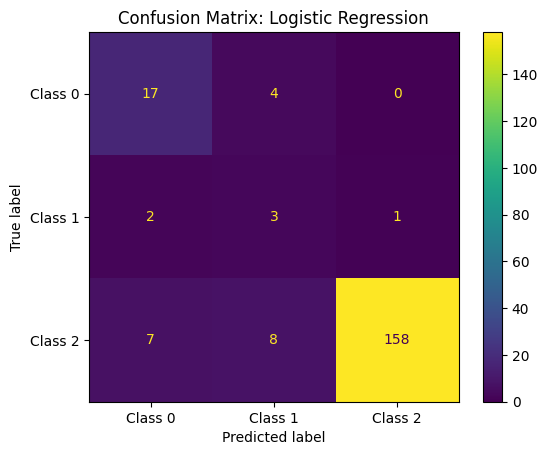

Confusion Matrix for K-Nearest Neighbors:


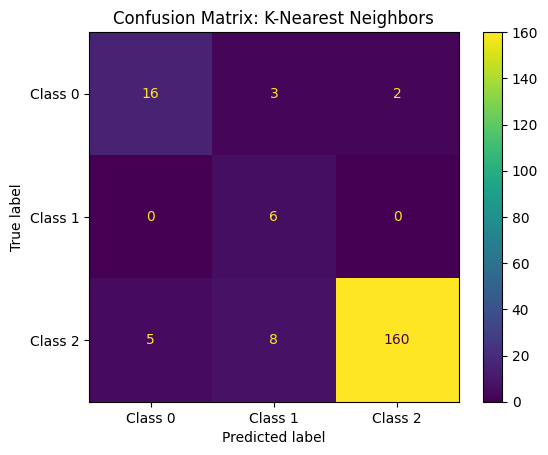

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay

# Fit models and display confusion matrix for each
for name, pipeline in models.items():
    print(f"Confusion Matrix for {name}:")
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Class 0', 'Class 1', 'Class 2'])
    plt.title(f"Confusion Matrix: {name}")
    plt.show()


C:\Users\roner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


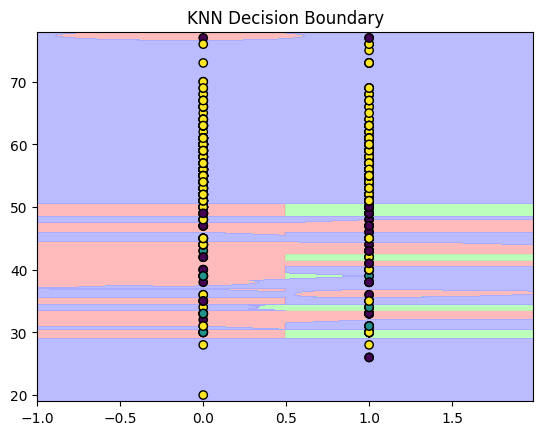

In [19]:
from matplotlib.colors import ListedColormap
import numpy as np

# Function to plot decision boundaries
def plot_decision_boundary(X, y, model, title):
    X = X.iloc[:, :2]  # Select only two features for 2D visualization
    model.fit(X, y)
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolor='k', marker='o')
    plt.title(title)
    plt.show()

# Example for KNN
knn_pipeline = models["K-Nearest Neighbors"]
plot_decision_boundary(X_train, y_train, knn_pipeline.named_steps['model'], "KNN Decision Boundary")
